In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


In [8]:
dataset = pd.read_csv("C:/Users/matia/Repositorios/Linear-Regression-Health-Costs-Calculator/insurance.csv")
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [9]:
X = dataset.drop('expenses', axis=1) 
y = dataset['expenses']

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['sex', 'smoker', 'region']
preprocessor = ColumnTransformer( transformers=[('cat', OneHotEncoder(drop='first'), categorical_features)], remainder='passthrough')
X = np.array(preprocessor.fit_transform(X), dtype = str)

from sklearn.model_selection import train_test_split
train_dataset, test_dataset, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_dataset = sc.fit_transform(train_dataset)
test_dataset = sc.transform(test_dataset)

In [14]:
model = Sequential()

model.add(Dense(12, activation='relu', input_shape=(train_dataset.shape[1],)))
model.add(Dropout(rate = 0.1))
model.add(Dense(12, activation='relu'))
model.add(Dropout(rate = 0.1))
model.add(Dense(6, activation='relu'))
model.add(Dropout(rate = 0.1))
model.add(Dense(3, activation='relu'))
model.add(Dense(1))  


model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error', 'mean_squared_error'])


model.fit(train_dataset, train_labels, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100


c:\Users\matia\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 13599.6523 - mean_absolute_error: 13599.6523 - mean_squared_error: 321796576.0000 - val_loss: 12655.1904 - val_mean_absolute_error: 12655.1904 - val_mean_squared_error: 310358144.0000
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13385.8408 - mean_absolute_error: 13385.8408 - mean_squared_error: 318164608.0000 - val_loss: 12654.7061 - val_mean_absolute_error: 12654.7061 - val_mean_squared_error: 310345184.0000
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13606.2676 - mean_absolute_error: 13606.2676 - mean_squared_error: 321716032.0000 - val_loss: 12653.8848 - val_mean_absolute_error: 12653.8848 - val_mean_squared_error: 310322336.0000
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13921.3379 - mean_absolute_error: 13921.3379 - mean_squared_error: 336572384.0000 - val_loss: 12652.5430 - val_mean_absolute_error: 12652.5430 - val_mean_squared_error: 310284832.0000
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0

9/9 - 0s - 5ms/step - loss: 3223.3032 - mean_absolute_error: 3223.3032 - mean_squared_error: 32441600.0000
Testing set Mean Abs Error: 3223.30 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


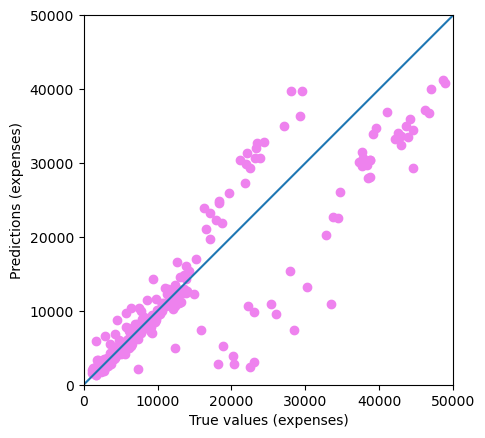

In [16]:

loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions, c='violet')
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
